In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import numpy.linalg as npl

In [13]:
def coordToIdx(x,y,N):
    return x + y*N

def vec2mat(x,N):
    mat = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            idx = coordToIdx(i,j,N)
            mat[i,j] = x[idx]
    return mat
def plotContour(matrix,N): 
    plt.contourf(np.linspace(0,1,N),np.linspace(0,1,N),matrix)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()
    plt.show()
def generateLaplacianMatrix2D(N):
	h = 1/N
	#assembly of the matrix second order FD
	A = sparse.diags([1.0,1.0, -4.0, 1.0,1.0], [-N,-1, 0, 1,N], shape=(N*N, N*N),format = "csr")

	#assembly of the matrix fourth order FD 
	#A = sparse.diags([-1,-1, 4, -1,-1], [-N,-1, 0, 1,N], shape=(N*N, N*N),format = "csr")
    
	return A/(h**2)

def generateLaplacianMatrix1D(N):
	h = 1/N

    #assembly of the matrix second order FD
	A = sparse.diags([1.0, -2.0, 1.0], [-1, 0, 1], shape=(N, N),format = "csr")

	#assembly of the matrix sixth order FD
	#A = sparse.diags([1.0/90.0, -3.0/20, 3.0/2.0, -49.0/18.0, 3.0/2.0, -3.0/20, 1.0/90], [-3,-2,-1, 0, 1,2,3], shape=(N, N),format = "csr")

	return A/(h**2)

def generateLoadVector(const,N):
    return np.ones(N*N)*const

def argand(a):
    import matplotlib.pyplot as plt
    import numpy as np
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'ro-',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()

# Solve 1D Laplace eigenvalue problem:

$\frac{\partial^2 u}{\partial x^2}(x) = \lambda u(x)$

$u(0) = u(1) = 0 $ 

$\Omega = [0,1] $

Use a second order finite difference of the second derivative such that the problem becomes :

$Au = \lambda u$

where $A \in R^{N \times N}$ a tridiagonal matrix.

### Analytic solution 
$\lambda < 0$

$u(x) = sin({n \pi}x)$


In [14]:
#solve the problem
N = 100
A = -1.0*generateLaplacianMatrix1D(N)
A = A.todense()
vals, vecs = npl.eig(A)

Min lambda :  9.674354160220531
Max lambda :  39990.32564583966
Lambda 1 = 9.674354160220531
Lambda 2 = 38.688057328101856
Lambda 3 = 87.01304061961864
Lambda 4 = 154.60255273444534
Lambda 5 = 241.39120518485845
Lambda 6 = 347.2950355547234


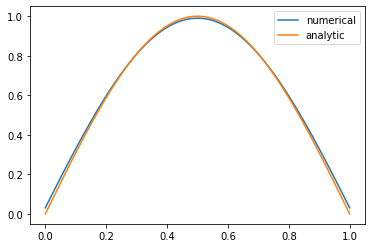

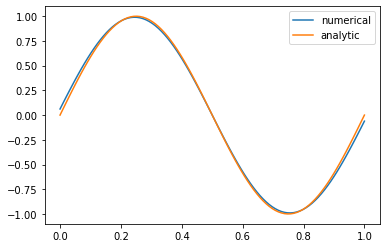

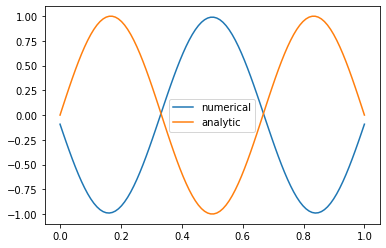

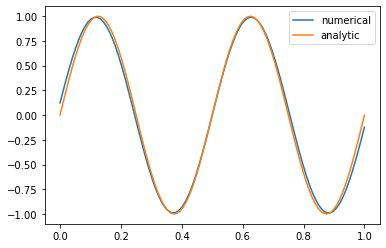

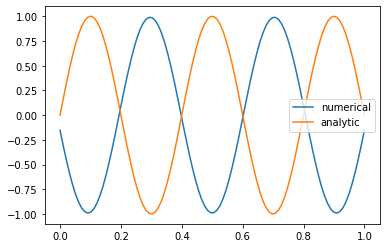

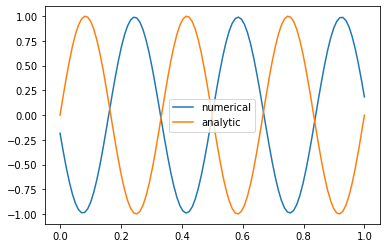

In [56]:
#sort by eigenvalue size
idx = np.argsort(vals)
vals = vals[idx]
vecs = vecs[:,idx]


print("Min lambda : ",min(vals))
print("Max lambda : ",max(vals))

#plot the first few solutions
for i in range(6):
    x = np.linspace(0,1,N)

    y_true = np.array([np.sin((i+1)*3.1415*xi) for xi in x])
    norm_true = npl.norm(y_true)

    y_num = norm_true*np.real(vecs[:,i])
    print("Lambda {} = {}".format(i+1,np.real(vals[i])))
    plt.figure()
    plt.plot(np.linspace(0,1,N),y_num,label = "numerical")
    plt.plot(x,y_true,label = "analytic")
    plt.legend()


# Solve 2D Laplace eigenvalue problem:

$\frac{\partial^2 u}{\partial x^2}(x,y) + \frac{\partial^2 u}{\partial y^2}(x,y) = \lambda u(x,y)$

$u(x,y) = 0 $ on $\partial \Omega$

$\Omega = [0,1] \times [0,1]$

Use a second order finite difference of the second derivative such that the problem becomes :

$Au = \lambda u$

where $A \in R^{N^2 \times N^2}$ a tridiagonal matrix.

In [60]:
N = 30
A = generateLaplacianMatrix2D(N)
A = A.todense()
vals, vecs = npl.eig(A)

Lambda 0 = -7180.811393655704


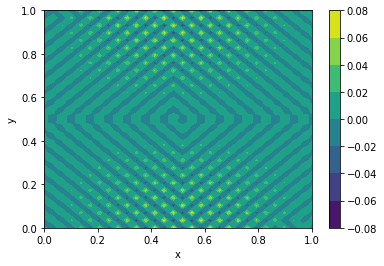

Lambda 1 = -7180.921965536776


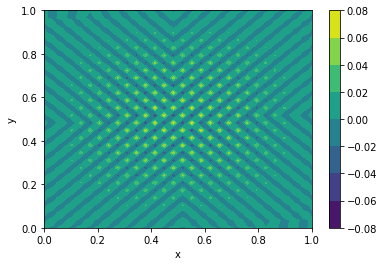

Lambda 2 = -7152.9126941396


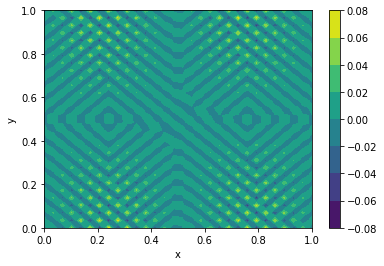

Lambda 3 = -7153.334105706826


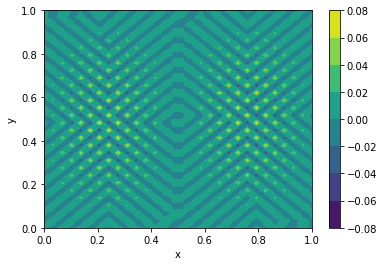

Lambda 4 = -7107.682525684114


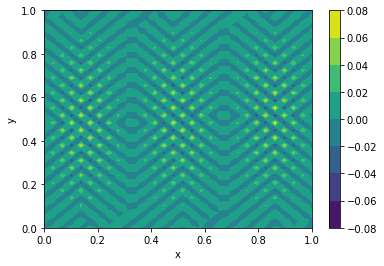

Lambda 5 = -7106.867895888681


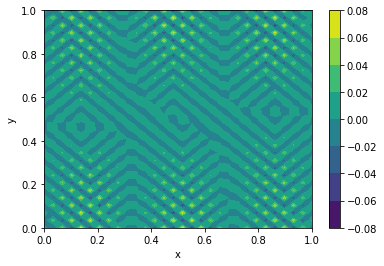

In [61]:
for i in range(6):
    mat = vec2mat(np.real(vecs[:,i]),N)
    print("Lambda {} = {}".format(i,np.real(vals[i])))
    plotContour(mat,N)